In [20]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
import seaborn as sns
# rc={"font.size":7, "axes.titlesize":7, "axes.labelsize":7, 'legend.fontsize': 7}
sns.set_context('paper', font_scale=0.73)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
import matplotlib.pyplot as plt

In [15]:
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.95
# perform power analysis
analysis = TTestIndPower()

In [22]:
def generate_heatmap(true_mean_var, effect_size, effect=0.8, alpha=0.05, power=0.80, fig_name='ttest_power_analysis.pdf', labelsize=7):
    # r=var, c=effect size
    settings = np.array([ [j/i for j in effect_size ] for i in true_mean_var ])

    f = lambda x: analysis.solve_power(effect_size=x, alpha=alpha, power=power)
    vf = np.vectorize(f)
    ns = vf(settings)*2
    
    f, ax = plt.subplots(figsize=(3, 1.8))
    cmap = sns.cm.rocket_r
    p = sns.heatmap(np.log(ns), annot=ns, fmt='.0f',
            cmap=cmap,
        )
    p.set_yticklabels(true_mean_var)
    p.set_xticklabels(effect_size)
    plt.xlabel('Difference in system quality')
    plt.ylabel('True mean std. deviation')
    plt.savefig(fig_name, bbox_inches='tight')

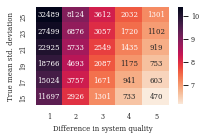

In [23]:
true_mean_var = np.arange(15, 26, 2)[::-1]
effect_size = np.arange(1, 6)
generate_heatmap(true_mean_var, effect_size, power=power)

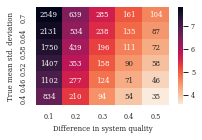

In [24]:
true_mean_var = np.around(np.linspace(0.4, 0.7, 6, endpoint=True)[::-1], 2)
effect_size = [0.1, 0.2, 0.3, 0.4, 0.5]
generate_heatmap(true_mean_var, effect_size, fig_name='ttest_power_analysis2.pdf', power=power)